In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings

# Configure plots
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('Biglycan breast cancer dataset/cancerBGNMama_v3.csv', delimiter=';')
df['Cancer'] = df['Cancer'].astype(str)  # Convert 'Cancer' column to string
df['imagem'] = df['imagem'].str.replace('/CANCER/', '')  # Remove the relative path prefix
print(df.head())

# Define image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='training',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='validation',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

# Function to create and compile model
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load the base models with pre-trained weights and exclude the top layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create the models
model_vgg16 = create_model(base_model_vgg16)
model_vgg19 = create_model(base_model_vgg19)
model_resnet50 = create_model(base_model_resnet50)

# Train the models
history_vgg16 = model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=10)
model_vgg16.save('vgg16_model.h5')

history_vgg19 = model_vgg19.fit(train_generator, validation_data=validation_generator, epochs=10)
model_vgg19.save('vgg19_model.h5')

history_resnet50 = model_resnet50.fit(train_generator, validation_data=validation_generator, epochs=10)
model_resnet50.save('resnet50_model.h5')


              imagem Cancer
0      252214-11.png      1
1       509314-2.png      1
2      10389 (3).png      1
3  12239 (6) (1).png      1
4      12239 (9).png      1
Found 163 validated image filenames belonging to 1 classes.
Found 40 validated image filenames belonging to 1 classes.
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1419s 280s/step - accuracy: 1.0000 - loss: 0.2105 - val_accuracy: 1.0000 - val_loss: 1.1016e-12
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 750s 125s/step - accuracy: 1.0000 - loss: 8.7970e-13 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 587s 85s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 523s 102s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 522s 76s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 575s 90

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1219s 186s/step - accuracy: 1.0000 - loss: 0.2401 - val_accuracy: 1.0000 - val_loss: 1.2225e-19
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1264s 175s/step - accuracy: 1.0000 - loss: 5.5241e-20 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 973s 176s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 622s 94s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 548s 105s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 511s 86s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 531s 88s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 733s 141s/step - accurac

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1716s 215s/step - accuracy: 0.6721 - loss: 0.5085 - val_accuracy: 1.0000 - val_loss: 0.1161
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2798s 463s/step - accuracy: 1.0000 - loss: 5.2269e-04 - val_accuracy: 1.0000 - val_loss: 0.0310
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2505s 423s/step - accuracy: 1.0000 - loss: 2.6186e-05 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3664s 598s/step - accuracy: 1.0000 - loss: 4.8863e-06 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1982s 266s/step - accuracy: 1.0000 - loss: 2.8647e-06 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1830s 298s/step - accuracy: 1.0000 - loss: 1.6074e-06 - val_accuracy: 1.0000 - val_loss: 6.4100e-04
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2041s 401s/step - accuracy: 1.0000 - loss: 1.3833e-06 - val_accuracy: 1.0000 - val_loss: 1.6318e-04
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1893s 362s/step - accuracy: 1.0000 -

In [1]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings


In [2]:

# Configure plots
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('Biglycan breast cancer dataset/cancerBGNMama_v3.csv', delimiter=';')
df['Cancer'] = df['Cancer'].astype(str)  # Convert 'Cancer' column to string
df['imagem'] = df['imagem'].str.replace('/CANCER/', '')  # Remove the relative path prefix
print(df.head())



              imagem Cancer
0      252214-11.png      1
1       509314-2.png      1
2      10389 (3).png      1
3  12239 (6) (1).png      1
4      12239 (9).png      1


In [3]:
# Define image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='training',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='validation',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)



Found 163 validated image filenames belonging to 1 classes.
Found 40 validated image filenames belonging to 1 classes.


In [4]:
#Define image data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='training',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)

validation_generator = train_datagen.flow_from_dataframe(
    dataframe=df,
    directory='Biglycan breast cancer dataset/CANCER/',  # Update this path to your image directory
    x_col='imagem',
    y_col='Cancer',
    subset='validation',
    batch_size=32,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224)
)



Found 163 validated image filenames belonging to 1 classes.
Found 40 validated image filenames belonging to 1 classes.


In [5]:
# Function to create and compile model
def create_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [6]:
# Load the base models with pre-trained weights and exclude the top layers
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))



In [7]:
# Create the models
model_vgg16 = create_model(base_model_vgg16)
model_vgg19 = create_model(base_model_vgg19)
model_resnet50 = create_model(base_model_resnet50)



In [13]:
# Train the models
history_vgg16 = model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=10)
model_vgg16.save('vgg16_model.keras')



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 798s 122s/step - accuracy: 1.0000 - loss: 0.3062 - val_accuracy: 1.0000 - val_loss: 1.6644e-11
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 461s 72s/step - accuracy: 1.0000 - loss: 1.2162e-11 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 384s 60s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 355s 58s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 352s 57s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 346s 66s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 348s 56s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 371s 61s/step - accuracy: 1.0

In [14]:
history_vgg19 = model_vgg19.fit(train_generator, validation_data=validation_generator, epochs=10)
model_vgg19.save('vgg19_model.keras')



Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 853s 129s/step - accuracy: 0.3783 - loss: 0.7267 - val_accuracy: 1.0000 - val_loss: 2.9989e-13
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 825s 144s/step - accuracy: 1.0000 - loss: 1.0952e-13 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1291s 218s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 721s 117s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 512s 82s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 595s 99s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 747s 146s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 917s 144s/step - accurac

In [8]:
history_resnet50 = model_resnet50.fit(train_generator, validation_data=validation_generator, epochs=10)
model_resnet50.save('resnet50_model.keras')

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1264s 190s/step - accuracy: 0.8178 - loss: 0.3115 - val_accuracy: 1.0000 - val_loss: 0.1571
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 974s 167s/step - accuracy: 1.0000 - loss: 3.1514e-04 - val_accuracy: 1.0000 - val_loss: 0.0552
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 755s 143s/step - accuracy: 1.0000 - loss: 2.2425e-05 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1264s 186s/step - accuracy: 1.0000 - loss: 1.1400e-05 - val_accuracy: 1.0000 - val_loss: 0.0108
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 880s 123s/step - accuracy: 1.0000 - loss: 5.0258e-06 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1024s 155s/step - accuracy: 1.0000 - loss: 3.1291e-06 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 780s 128s/step - accuracy: 1.0000 - loss: 2.5492e-06 - val_accuracy: 1.0000 - val_loss: 4.8129e-04
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2292s 366s/step - accuracy: 1.0000 - loss: 2

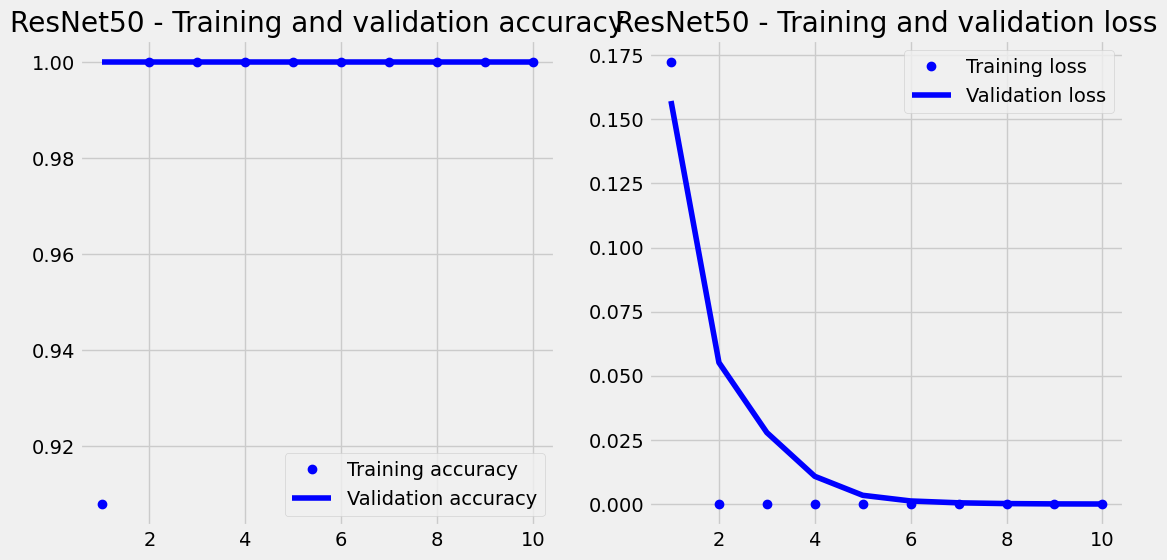

In [12]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name} - Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} - Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history_resnet50, "ResNet50")


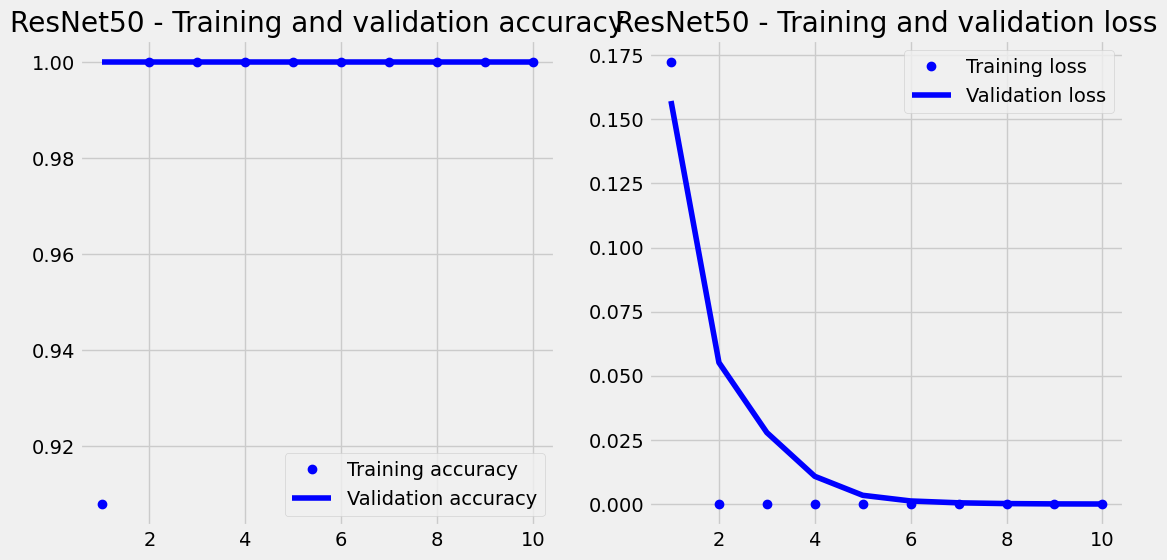

In [11]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{model_name} - Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{model_name} - Training and validation loss')
    plt.legend()

    plt.show()


plot_history(history_resnet50, "ResNet50")
